# 3.01.1 Display Meteorological data


Station: Kloten/Zürich Flughafen

Legende:

    stn; time; brefarz0; prestas0; tre200s0; rre150z0; ure200s0; fkl010z0
    
    brefarz0  No                                   Fernblitze (Entfernung 3 - 30 km); Zehnminutensumme
    prestas0  hPa                                  Luftdruck auf Stationshöhe (QFE); Momentanwert
    tre200s0  °C                                   Lufttemperatur 2 m über Boden; Momentanwert
    rre150z0  mm                                   Niederschlag; Zehnminutensumme
    ure200s0  %                                    Relative Luftfeuchtigkeit 2 m über Boden; Momentanwert
    fkl010z0  m/s                                  Windgeschwindigkeit skalar; Zehnminutenmittel

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import date

def scale(a):    return (a-a.min())/(a.max()-a.min())

## Read Meteorological data

In [14]:
def read_meteo_data(fName):
    colNames = ['Stao','time', 'Flash', 'p_QNH', 'T_2m', 'Precip', 'H_rel', 'V_wind']  
    df = pd.read_csv(fName,sep=';', skiprows=3, names=colNames, na_values='-')
    print(df.head())
    return df

fPath = '/mnt/daten/04_Schule/42_Kanti/Matrua/Music_generation/Organisation/MeteoSchweiz/Daten/'
fName = 'order_74678_data.txt'
dM = read_meteo_data(fPath+fName)

#---- Parameter bestimmen -----------
NT, MP = dM.shape
print('-----------------')
print('NT, MP', NT, MP)

  Stao          time  Flash  p_QNH  T_2m  Precip  H_rel  V_wind
0  KLO  201908280000      0  968.5  19.6     0.0   90.1     0.6
1  KLO  201908280010      0  968.5  19.3     0.0   93.0     0.6
2  KLO  201908280020      0  968.6  19.4     0.0   90.6     0.7
3  KLO  201908280030      0  968.7  19.6     0.0   90.3     0.7
4  KLO  201908280040      0  968.7  18.7     0.0   95.6     0.5
-----------------
NT, MP 2016 8


## Parse begin and end date

In [16]:
def parse_date(A):
    yr = int(str(A)[0:4])
    mo = int(str(A)[4:6])
    dy = int(str(A)[6:8])
    hr = int(str(A)[8:10])
    mi = int(str(A)[10:12])
    return date(yr,mo,dy)
    
firstDateM = dM['time'].iloc[0]
lastDateM = dM['time'].iloc[-1]

firstDate = parse_date(firstDateM); print('firstDate', firstDate)
lastDate = parse_date(lastDateM);   print('lastDate',  lastDate)

firstDate 2019-08-28
lastDate 2019-09-10


## Plot data

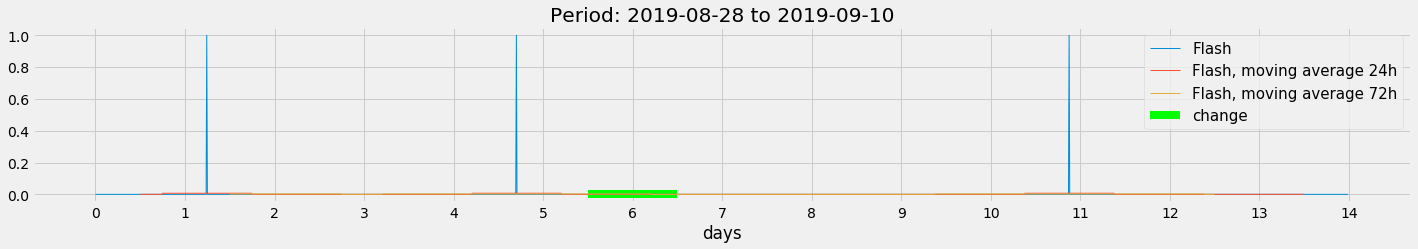

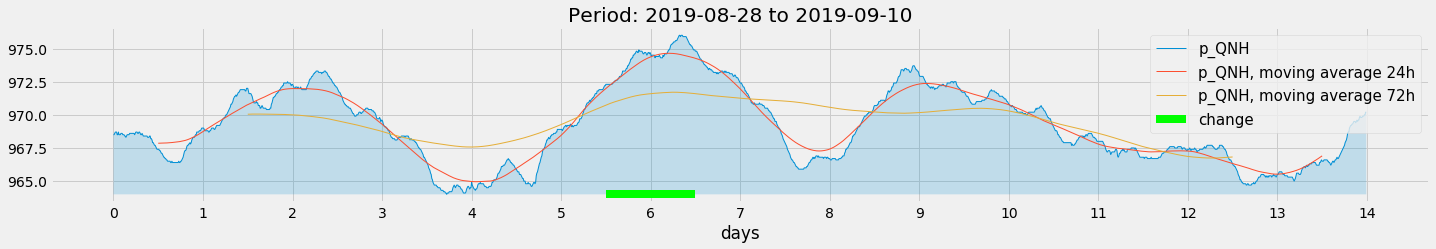

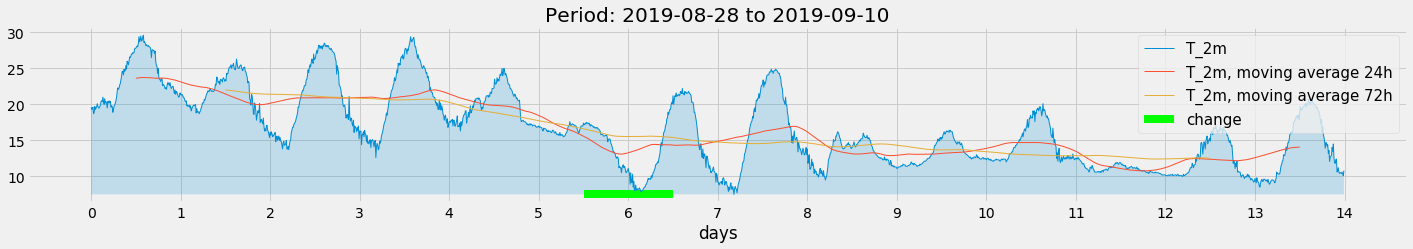

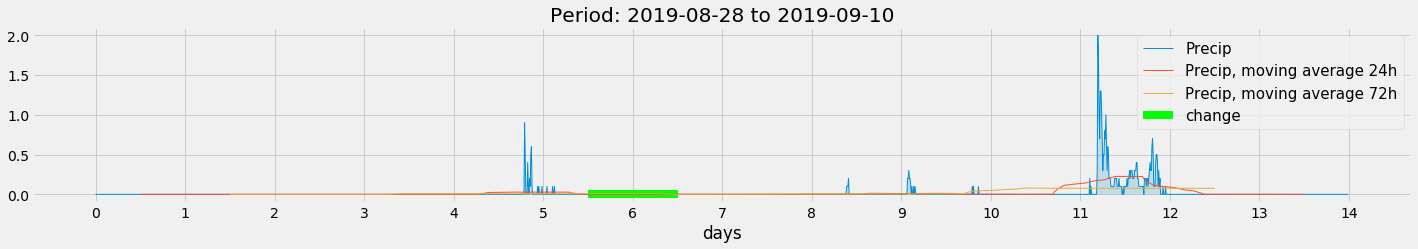

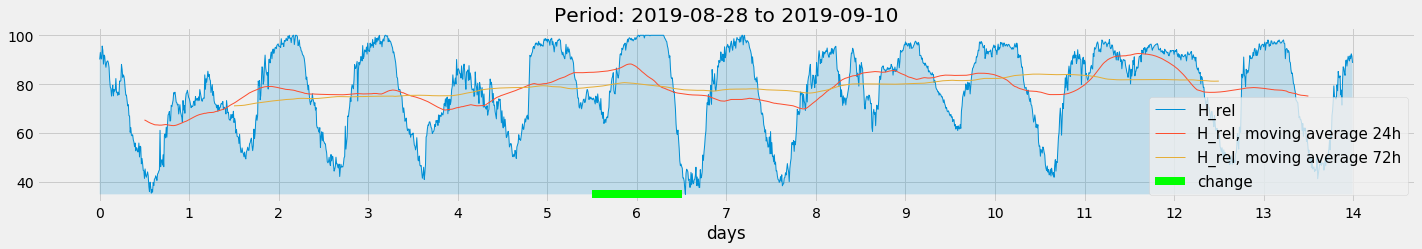

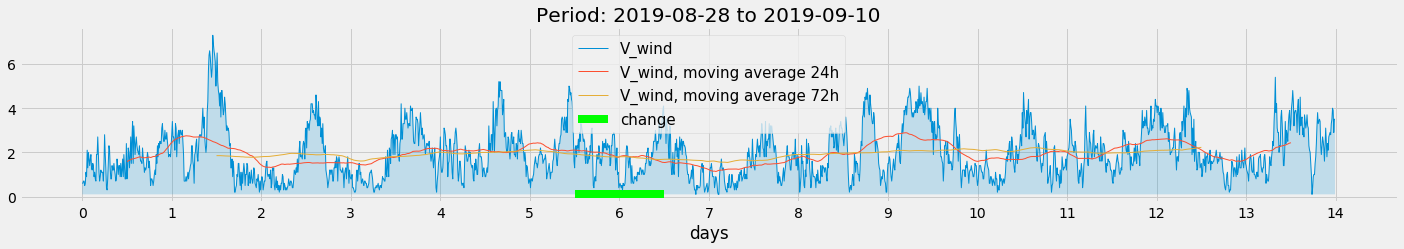

In [17]:
#---- Parameter festlegen ----------
h24 = 6*24
h72 = 3*h24
tt = np.arange(NT)/h24  # Zeitachse in Tagen

#---- graphics ---------------------
with plt.style.context('fivethirtyeight'): 
    for k in range(2,MP,1):
        fig = plt.figure(figsize=(22,3)) 
        ax = fig.add_subplot(111)
        
        Y = np.array(dM[dM.columns[k]])
        Y24 = np.array(dM[dM.columns[k]].rolling(window=h24,center=True).mean())
        Y72 = np.array(dM[dM.columns[k]].rolling(window=h72,center=True).mean())
        
        plt.plot(tt,Y,linewidth=1.0, label=dM.columns[k])
        plt.fill_between(tt,Y,Y.min(),alpha=0.2)
        plt.plot(tt,Y24,linewidth=1.0, label=dM.columns[k]+', moving average 24h')
        plt.plot(tt,Y72,linewidth=1.0, label=dM.columns[k]+', moving average 72h')
        
        plt.hlines(Y.min(),5.5, 6.5, colors='lime', linewidth=8, linestyles='solid', label='change')
        
        loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)
        plt.title('Period: '+str(firstDate)+' to '+str(lastDate))
        plt.xlabel('days')
        plt.legend(prop={'size':15})
        plt.show()

In [18]:
for k in range(2,MP,1):
    print(k, dM.columns[k])

2 Flash
3 p_QNH
4 T_2m
5 Precip
6 H_rel
7 V_wind
